# Домашнее задание 5

• Выберите в Ваших данных 3-6 признаков, более или
менее относящихся к одному и тому же аспекту данных;
откомментируйте.

• Визуализируйте Ваши данные дважды, один раз с
использованием стандартизации на размах, второй –
путем z-scoring. Выберите какую-либо группу объектов и
выделите ее на визуализациях цветом или формой
«точек».

• Примените традиционный метод МГК для визуализации
(для какого-либо способа нормализации) и убедитесь,
что получено то же самое, что и выше. Если нет –
объясните, в чем дело.

• Постарайтесь проинтерпретировать полученные
компоненты

## Решение:

Возьмём признаки, по которым можно примерно определить местность, на которой случилась авария.
- Road_Type
- Speed_limit
- Light_Conditions
- Road_Surface_Conditions
- Longitude
- Latitude

Так же, так как объектов, в которых местность не городская всего 60, то оставим с городской местнотью тоже 60 объектов. Итого - 120.

In [110]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns


full_data = pandas.read_csv('../data/RoadSafetyData_Accidents_2018.csv').filter(items=[ \
                             ""                                                     'Road_Type', \
                                                                                  'Speed_limit', \
                                                                                  'Light_Conditions', \
                                                                                  'Road_Surface_Conditions', \
                                                                                  'Longitude', 'Latitude', \
                                                                                    'Urban_or_Rural_Area'])
full_data.head()

,Road_Type,Speed_limit,Light_Conditions,Road_Surface_Conditions,Longitude,Latitude,Urban_or_Rural_Area
0,3,30,4,1,-0.139737,51.524587,1
1,6,30,4,1,0.046471,51.539651,1
2,6,20,4,1,-0.102474,51.529746,1
3,3,30,4,2,0.037828,51.530179,1
4,6,30,4,2,0.065781,51.469258,1


In [111]:
full_data.shape

(2000, 7)

In [112]:
rural_data = full_data[full_data['Urban_or_Rural_Area'] == 2]

Так как объектов очень много - оставим только 120. 

In [113]:
full_data.drop(full_data.tail(full_data.shape[0] - 60).index, inplace=True)
full_data.drop(full_data[full_data['Urban_or_Rural_Area'] == 2].index, axis=0)
full_data.shape

(60, 7)

In [114]:
data = full_data
data = data.append(rural_data)
data_with_area = data.copy(deep=True)

In [115]:
data.drop(['Urban_or_Rural_Area'], inplace=True, axis=1)

In [116]:
data

,Road_Type,Speed_limit,Light_Conditions,Road_Surface_Conditions,Longitude,Latitude
0,3,30,4,1,-0.139737,51.524587
1,6,30,4,1,0.046471,51.539651
2,6,20,4,1,-0.102474,51.529746
3,3,30,4,2,0.037828,51.530179
4,6,30,4,2,0.065781,51.469258
...,...,...,...,...,...,...
1879,1,30,1,1,0.189432,51.519623
1939,1,30,1,1,0.044235,51.576650
1971,6,30,4,1,-0.491142,51.469295
1973,9,30,1,1,-0.121739,51.492556


Готово. Теперь сначала нормализуем данные двумя способами(z-scoring и нормализацией размахом), а потом с помощью SVD визуализируем группу некоторых объектов.

Все формулы взяты с лекции.

Для начала z-scoring:

In [117]:
data_zscoring =(data-data.mean())/data.std()
data_zscoring

,Road_Type,Speed_limit,Light_Conditions,Road_Surface_Conditions,Longitude,Latitude
0,-0.815015,-0.351405,0.631544,-0.713315,-0.230273,-0.041542
1,0.770960,-0.351405,0.631544,-0.713315,0.763054,0.174973
2,0.770960,-1.104417,0.631544,-0.713315,-0.031493,0.032609
3,-0.815015,-0.351405,0.631544,1.147507,0.716948,0.038832
4,0.770960,-0.351405,0.631544,1.147507,0.866063,-0.836784
...,...,...,...,...,...,...
1879,-1.872331,-0.351405,-1.144674,-0.713315,1.525679,-0.112889
1939,-1.872331,-0.351405,-1.144674,-0.713315,0.751126,0.706759
1971,0.770960,-0.351405,0.631544,-0.713315,-2.104843,-0.836252
1973,2.356934,-0.351405,-1.144674,-0.713315,-0.134263,-0.501923


Теперь нормализация размахом:

In [118]:
data_scope_scaller = (data-data.mean())/(data.max() - data.min())
data_scope_scaller

,Road_Type,Speed_limit,Light_Conditions,Road_Surface_Conditions,Longitude,Latitude
0,-0.192708,-0.093333,0.177778,-0.127778,-0.055001,-0.008382
1,0.182292,-0.093333,0.177778,-0.127778,0.182258,0.035307
2,0.182292,-0.293333,0.177778,-0.127778,-0.007522,0.006580
3,-0.192708,-0.093333,0.177778,0.205556,0.171245,0.007836
4,0.182292,-0.093333,0.177778,0.205556,0.206862,-0.168850
...,...,...,...,...,...,...
1879,-0.442708,-0.093333,-0.322222,-0.127778,0.364413,-0.022779
1939,-0.442708,-0.093333,-0.322222,-0.127778,0.179409,0.142613
1971,0.182292,-0.093333,0.177778,-0.127778,-0.502748,-0.168743
1973,0.557292,-0.093333,-0.322222,-0.127778,-0.032069,-0.101280


А теперь визуализируем обе нормализации с помощью SVD.

In [119]:
u, s, v = np.linalg.svd(data_zscoring, full_matrices=True)
print(u.shape, s.shape, v.shape)

(120, 120) (6,) (6, 6)


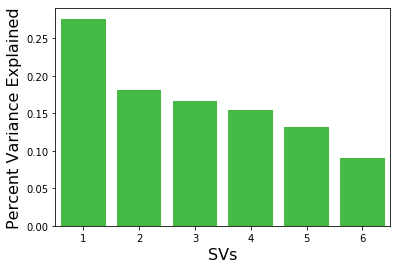

In [120]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

Text(0.5, 1.0, 'Z-SCORING')

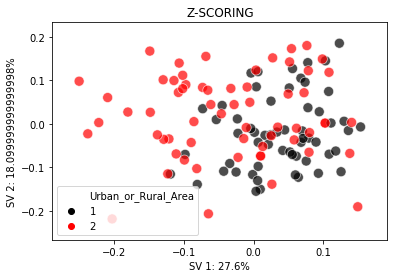

In [121]:
labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pandas.DataFrame(u[:,[0,1]], index=data_with_area["Urban_or_Rural_Area"].tolist(), columns=labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Urban_or_Rural_Area'}, inplace=True)
color_dict = dict({1:'Black',
                   2: 'Red'})
sns.scatterplot(x="SV1", y="SV2", hue="Urban_or_Rural_Area", 
                palette=color_dict, 
                data=svd_df, s=100,
                alpha=0.7)
plt.xlabel('SV 1: {0}%'.format(var_explained[0]*100))
plt.ylabel('SV 2: {0}%'.format(var_explained[1]*100))
plt.title("Z-SCORING")

Такая визуализация получилась для z-scoring

In [122]:
u, s, v = np.linalg.svd(data_scope_scaller, full_matrices=True)
print(u.shape, s.shape, v.shape)

(120, 120) (6,) (6, 6)


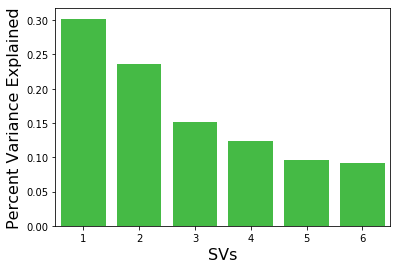

In [123]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

Text(0.5, 1.0, 'Scope scaller')

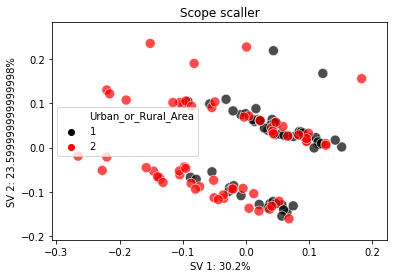

In [124]:
labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pandas.DataFrame(u[:,[0,1]], index=data_with_area["Urban_or_Rural_Area"].tolist(), columns=labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Urban_or_Rural_Area'}, inplace=True)
color_dict = dict({1:'Black',
                   2: 'Red'})
sns.scatterplot(x="SV1", y="SV2", hue="Urban_or_Rural_Area", 
                palette=color_dict, 
                data=svd_df, s=100,
                alpha=0.7)
plt.xlabel('SV 1: {0}%'.format(var_explained[0]*100))
plt.ylabel('SV 2: {0}%'.format(var_explained[1]*100))
plt.title("Scope scaller")

А такая для нормализации размахом.

А теперь применим МГК для визуализации. Сделаем это для нормализации размахом.

In [149]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
features = pca.fit_transform(data_scope_scaller)

In [150]:
res = pandas.DataFrame(features, index=data_with_area["Urban_or_Rural_Area"].tolist())
res=res.reset_index()
res.rename(columns={'index':'Urban_or_Rural_Area'}, inplace=True)

In [151]:
res

,Urban_or_Rural_Area,0,1
0,1,-0.064333,0.195152
1,1,-0.120355,0.120169
2,1,-0.344135,0.071227
3,1,0.027712,0.229063
4,1,-0.159319,0.089979
...,...,...,...
115,2,0.365423,-0.162231
116,2,0.330689,-0.143752
117,2,-0.438788,0.016920
118,2,-0.236454,-0.493853


Text(0.5, 1.0, 'Scope scaller')

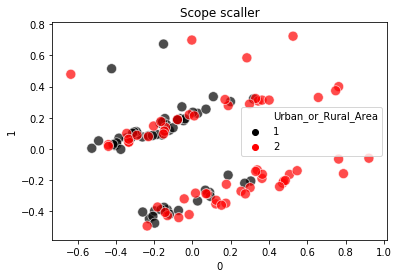

In [152]:
color_dict = dict({1:'Black',
                   2: 'Red'})
sns.scatterplot(x=0, y=1, hue="Urban_or_Rural_Area", 
                palette=color_dict, 
                data=res, s=100,
                alpha=0.7)

plt.title("Scope scaller")

Неплохо!! Получилось точно так же как и при SVD. Только отзеркалено. Применим немного магии...

Text(0.5, 1.0, 'Scope scaller')

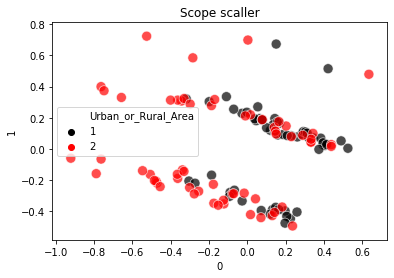

In [153]:
res[0] = res[0] * -1
color_dict = dict({1:'Black',
                   2: 'Red'})
sns.scatterplot(x=0, y=1, hue="Urban_or_Rural_Area", 
                palette=color_dict, 
                data=res, s=100,
                alpha=0.7)

plt.title("Scope scaller")

Вуаля. Теперь визуализация один в один! В чём и требовалось убедиться)

Пытался разбить на категории аварий в городской и сельской местностях. Но так как аварий с сельской местностью довольно мало - получилось не прям супер. НО ОЧЕНЬ ДАЖЕ НИЧЕГО!

Дело в том что каких-то признаков для сельской местности особо нет. Только ширина и долгота(и, возможно, тип доороги)помогают это сделать. 

Но на визуализации явно видно, что всё-таки есть чёткое разделение на две группы!